# IMDB Movie Review Project

In this NLP project I will be attempting to classify `IMDB Movie Reviews` into a postive and negative sentiment categories based off the text content in the reviews. This dataset is puliculy available at [kaggle](https://www.kaggle.com/datasets).

Each observation in this dataset is a review of movies. The `sentiment` column is the category of those reviews as postive and negative, and `review` column is the text review by customers.

# Import libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings # warning messages
warnings.filterwarnings('ignore')
%matplotlib inline

# Load dataset 

*I downloaded the dataset from Kaggle to my personal computer and read the `IMDB Dataset.csv` to the project environment.*

In [2]:
imdb_review = pd.read_csv("IMDB Dataset.csv")

*Let's check the head, info, describe methods on imdb_review data*

In [3]:
imdb_review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
imdb_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
imdb_review.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


*Let's create a new column called `Review Length` which is the number of words in the `review` column.*

In [7]:
imdb_review['Review Length'] = imdb_review['review'].apply(len)

In [9]:
imdb_review.head()

,review,sentiment,Review Length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


## Explanatory Data Analysis 

I will use the `FaceGrid` function from `seaborn` library to create a grid of 2 histograms of review text length based off the sentiments.

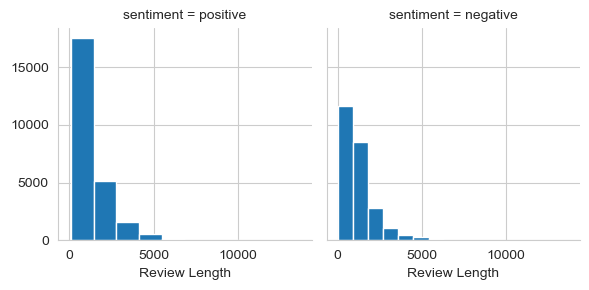

In [11]:
g = sns.FacetGrid(imdb_review, col = 'sentiment')
g.map(plt.hist, "Review Length")

**Create a boxplot of `Review Length` for each `sentiment` category.**

<Axes: xlabel='sentiment', ylabel='Review Length'>

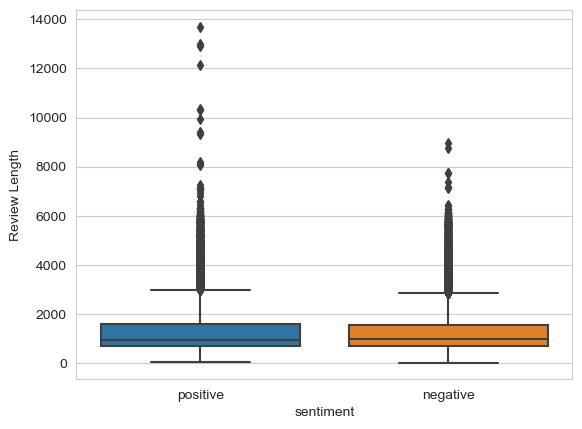

In [21]:
sns.boxplot(x = 'sentiment', y = 'Review Length', data = imdb_review, 
             palette= None)

**Use `groupby` to get the mean values for the `Review Length` by `sentiment`.**

In [29]:
sentiments = imdb_review.groupby('sentiment').mean()
sentiments

,Review Length
sentiment,
negative,1294.06436
positive,1324.79768


***Average words in the positive sentiment is larger than the negative sentiment.***

# NLP Classification Task 

***Let's move on the actual task. Create two objects X, and y. X will be the `review` column of `imdb_review` and y will be the `review` column.***

In [30]:
X = imdb_review['review']
y = imdb_review['sentiment']

***Import `CountVectorizer` and create a CountVectorizer object.***

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
c_v = CountVectorizer()

***Use the `fit_transform` method on the `CountVectorizer` object and pass in `X`(the text column). Save the result by overwriting `X`.***

In [32]:
X = c_v.fit_transform(X)

## Training Test Split 
*Let's split our dataframe into training and testing data.* 
***I will use `train_test_split` to split up the data into `X_train`, `X_test`, `y_train`, `y_test`. And I will use `test_size=0.3` and `random_state=202306`.***

A dataset used for machine learning should be partitioned into three subsets ---
training, test, and validation sets.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=202306)

## Train a Model
***I will import `MultinomialNB` and create an instance of the estimator and call is `n_b`.***

After a data scientist has preprocessed the collected data and split it into
subsets, he or she can proceed with a model training. This process entails
"feeding" the algorithm with training data. An algorithm will process data and
output a model that is able to find a target value (attribute) in new data
an answer you want to get with predictive analysis. The purpose of model
training is to develop a model.

In [37]:
from sklearn.naive_bayes import MultinomialNB
n_b = MultinomialNB()

In [38]:
# Fit n_b using training data

n_b.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

***I will use the `predict` method off `n_b` to predict labels from `X_test`.***

The goal of this step is to develop the simplest model able to formulate a
target value fast and well enough. A data scientist can achieve this goal
through model tuning. That's the optimization of model parameters to achieve an
algorithm's best performance. 

In [39]:
predictions = n_b.predict(X_test)

*Create a confusion matrix and classification report uisng these predictions and `y_test`.*

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[6746  890]
 [1360 6004]]


              precision    recall  f1-score   support

    negative       0.83      0.88      0.86      7636
    positive       0.87      0.82      0.84      7364

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



## Using Text Processing

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
# import pipline from sklean
from sklearn.pipeline import Pipeline

***Now let me create a pipeline wiht hte following steps: `CountVerctorizer()`, `TfidfTransformer()`, `MultinomialNB()`.***

In [44]:
pipe_line = Pipeline([
    ('bag_of_words', CountVectorizer()), # tokenizer
    ('tfidf', TfidfTransformer()), # integer counts to weight TF-IDF scores
    ('classifier', MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifie
])

### While using pipeline
pipeline has all my pre-processed steps in it already, meaning I will need to re-split the original data.

## Train Test Split (*using Pipeline*)

In [45]:
X = imdb_review['review']
y = imdb_review['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=202306)

*I can't use the same training data as last time because that data has already be vectorized. I need to pass in just the text and labels.*

In [47]:
pipe_line.fit(X_train, y_train)

Pipeline(steps=[('bag_of_words', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

***Now use the pipeline to predict from `X_test` and create a classification report and confusion matrix.***

In [48]:
predictions = pipe_line.predict(X_test)

In [49]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[6765  871]
 [1133 6231]]


              precision    recall  f1-score   support

    negative       0.86      0.89      0.87      7636
    positive       0.88      0.85      0.86      7364

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000

